In [2]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# read file
df = pd.read_csv('movies.csv')
df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,2020,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000.0,NaN,NaN,90.0
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,NaN,NaN,Cactus Blue Entertainment,90.0
7665,Saving Mbango,NaN,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750.0,NaN,Embi Productions,NaN
7666,It's Just Us,NaN,Drama,2020,"October 1, 2020 (United States)",NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000.0,NaN,NaN,120.0


In [4]:
# Data types for columns
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

#### Data Cleaning

In [5]:
# Find the sum of all the null values in each column
df.isnull().sum()

name           0
rating        77
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64

In [6]:
# Drop all null values and keep df inplace.
df.dropna(inplace=True)

In [7]:
# Check null values count again to validate.
df.isnull().sum()

name        0
rating      0
genre       0
year        0
released    0
score       0
votes       0
director    0
writer      0
star        0
country     0
budget      0
gross       0
company     0
runtime     0
dtype: int64

#### Data Analysis

1) Find the count of movies released based on year

In [8]:
years = df.groupby('year')['name'].count()
years_df = pd.DataFrame(years)
years_df.columns = ['Count']
years_df

,Count
year,
1980,40
1981,63
1982,71
1983,83
1984,88
1985,95
1986,99
1987,104
1988,130


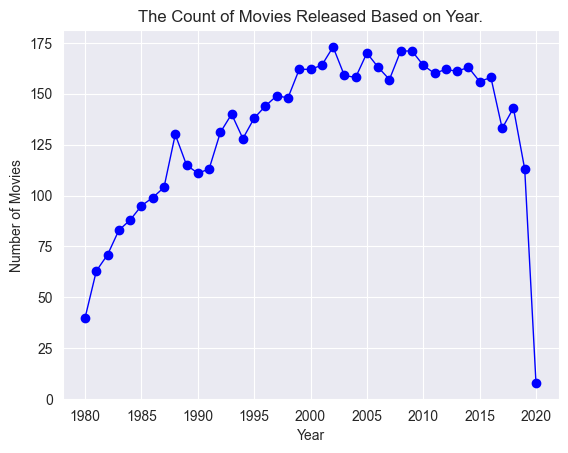

In [9]:
# plot the count of movies of each year
plt.plot(years_df.index, years_df['Count'], color='blue', marker='o', linestyle='-', linewidth=1)
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.title("The Count of Movies Released Based on Year.")
plt.grid(True)
plt.show()

2) Find the rating trend based on the year

In [10]:
ratings = df['rating'].value_counts()
ratings_df = pd.DataFrame(ratings)
ratings_df.columns = ['Count']
ratings_df

,Count
rating,
R,2597
PG-13,1729
PG,907
G,111
Not Rated,44
Unrated,17
NC-17,12
TV-MA,2
Approved,1


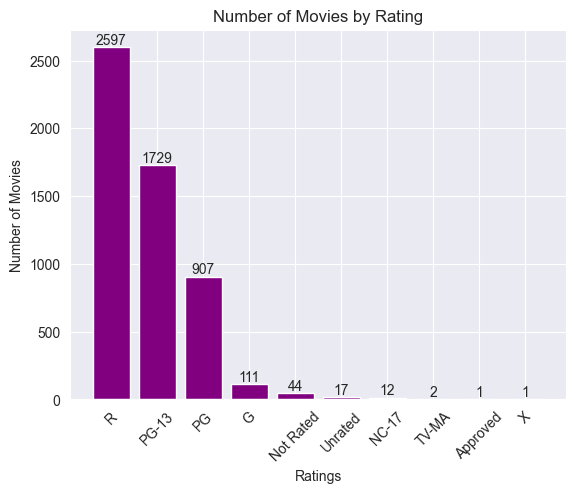

In [11]:
# Plot a bar graph
bars = plt.bar(ratings_df.index, ratings_df['Count'], color='purple')
plt.title('Number of Movies by Rating')
plt.xlabel("Ratings")
plt.xticks(rotation=45)
plt.grid(True)
plt.ylabel("Number of Movies")

for i, count in enumerate(ratings_df['Count']):
    plt.text(ratings_df.index[i], count, str(count), ha='center', va='bottom')
plt.show()

3) Which movie made the highest gross and in which year

In [12]:
max_gross_df = df.loc[df['gross'].idxmax()]
gross_name = max_gross_df['name']
gross_count = max_gross_df['gross']
gross_year = max_gross_df['year']
print(gross_name, gross_year, gross_count)


Avatar 2009 2847246203.0


4) Find top 20 companies who produced the highest films

In [13]:
company = df['company'].value_counts()
company_df = pd.DataFrame(company)
company_df.columns = ['count']
company_df.head(20)

,count
company,
Universal Pictures,330
Columbia Pictures,302
Warner Bros.,298
Paramount Pictures,279
Twentieth Century Fox,209
New Line Cinema,155
Walt Disney Pictures,107
Touchstone Pictures,105
Metro-Goldwyn-Mayer (MGM),99


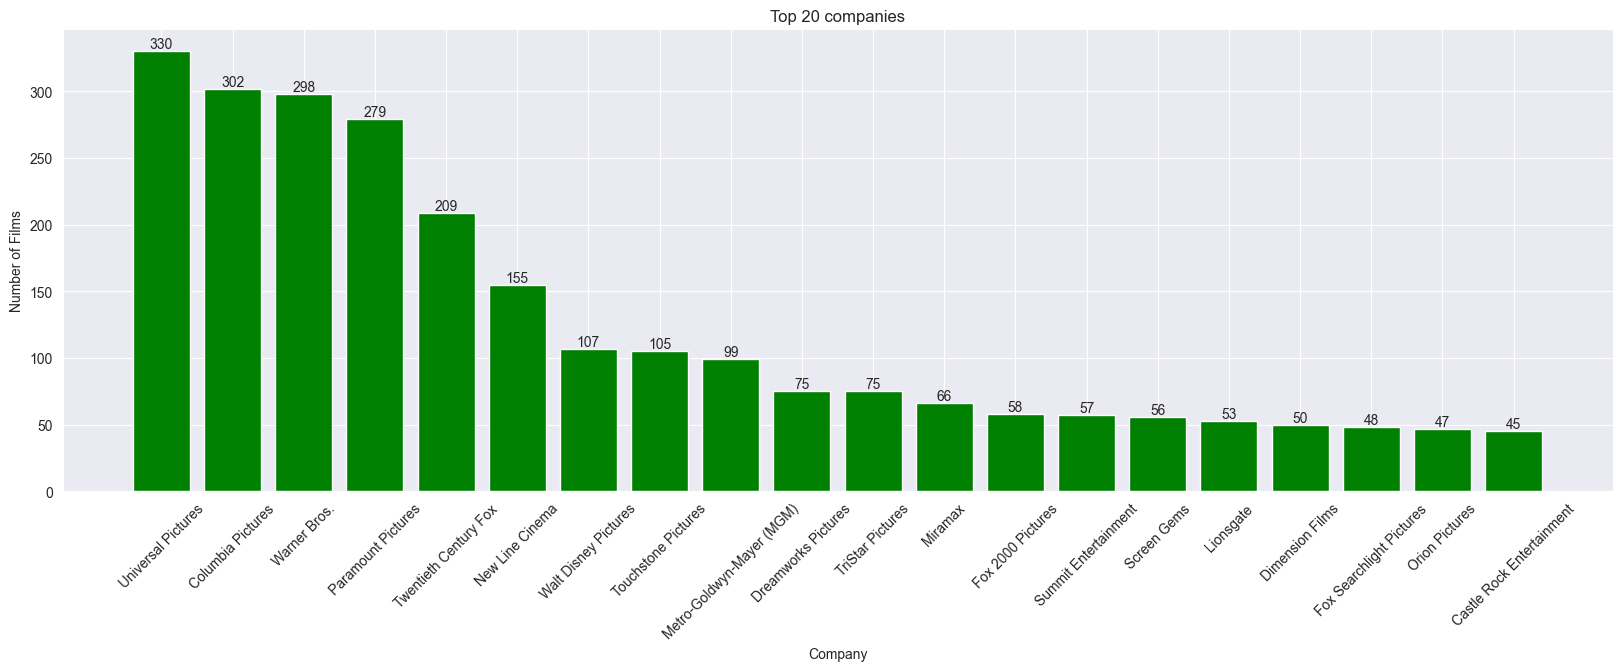

In [14]:
# Plot the companies with the highest films
company_df = company_df[:20]
plt.figure(figsize=(20, 6))
plt.bar(company_df.index, company_df['count'], color='green')
plt.title('Top 20 companies')
plt.xlabel('Company')
plt.xticks(rotation=45)
plt.ylabel('Number of Films')

for i, count in enumerate(company_df['count']):
    plt.text(company_df.index[i], count, str(count), ha='center', va='bottom')

plt.show()

scatter plot with budget vs gross

[None]

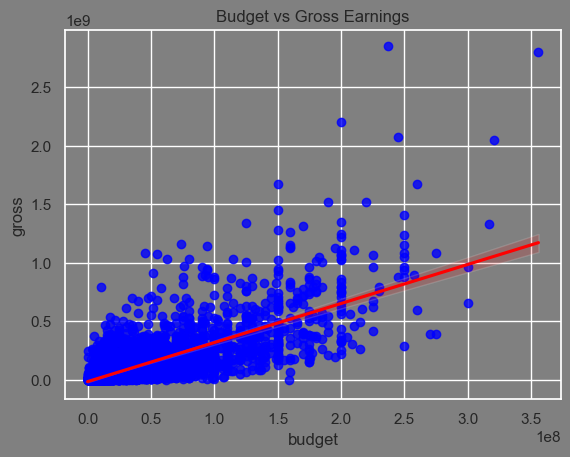

In [25]:
# Scatter plot for budget and gross earnings
sns.regplot(x='budget', y='gross', data=df, scatter_kws={'color':'blue'}, line_kws={'color':'red'}).set_title('Budget vs Gross Earnings')

Genre Distribution

In [27]:
genre_dist = df['genre'].value_counts()
genre_df = pd.DataFrame(genre_dist)
genre_df.columns = ['count']
genre_df

,count
genre,
Comedy,1496
Action,1415
Drama,863
Crime,399
Adventure,327
Biography,311
Animation,277
Horror,251
Fantasy,41


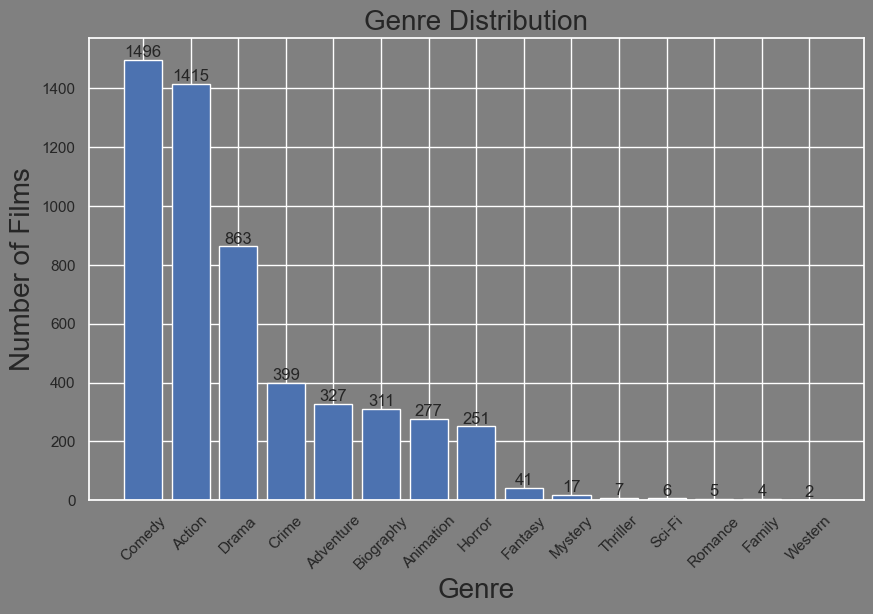

In [36]:
plt.figure(figsize=(10, 6))
plt.bar(genre_df.index, genre_df['count'], )
plt.title('Genre Distribution', fontsize=20)
plt.xlabel('Genre', fontsize=20)
plt.xticks(rotation=45)
plt.ylabel('Number of Films', fontsize=20)

for i, count in enumerate(genre_df['count']):
    plt.text(genre_df.index[i], count, str(count), ha='center', va='bottom')

plt.show()

Find the distribution of score

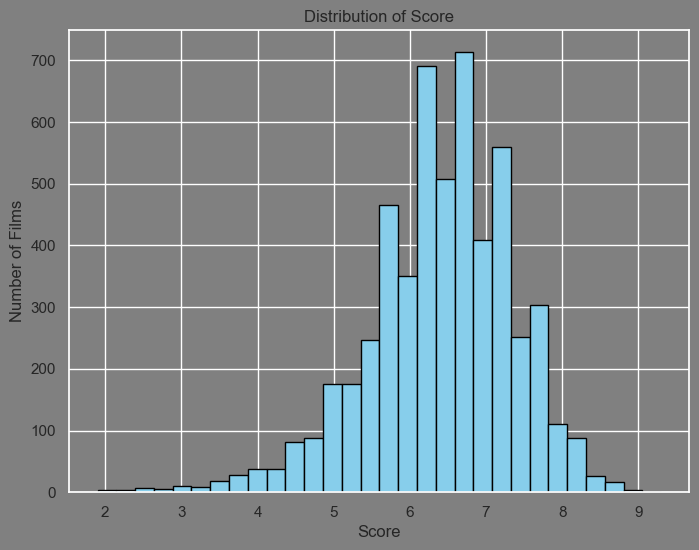

In [48]:
plt.figure(figsize=(8,6))
plt.hist(df['score'], bins=30, fill=True, color='skyblue', ec='black')
plt.title('Distribution of Score')
plt.xlabel('Score')
plt.ylabel('Number of Films')
plt.show()

#### Correlation

Highest Correlation to Gross Earning

In [66]:
# Create a correlation data frame of the data
correlation = df.corr(method='pearson', numeric_only=True)
correlation_df = pd.DataFrame(correlation)
correlation_df

,year,score,votes,budget,gross,runtime
year,1.000000,0.056386,0.206021,0.327722,0.274321,0.075077
score,0.056386,1.000000,0.474256,0.072001,0.222556,0.414068
votes,0.206021,0.474256,1.000000,0.439675,0.614751,0.352303
budget,0.327722,0.072001,0.439675,1.000000,0.740247,0.318695
gross,0.274321,0.222556,0.614751,0.740247,1.000000,0.275796
runtime,0.075077,0.414068,0.352303,0.318695,0.275796,1.000000


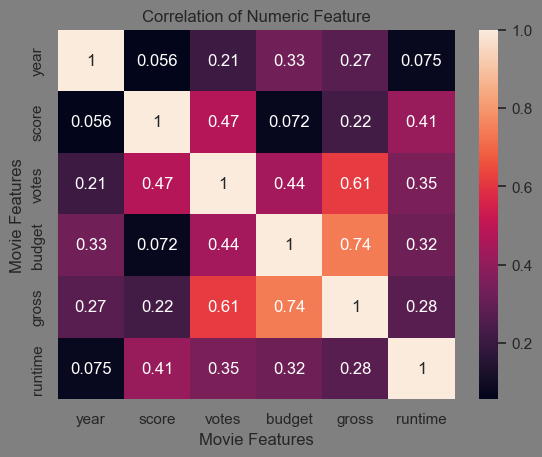

In [69]:
#plot the correlation
sns.heatmap(correlation_df, annot=True)
plt.title("Correlation of Numeric Feature")
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

*Answer: According to the heatmap displayed above, **film budget has the highest correlation to film gross earnings** of all the films in the data frame.*

In [70]:
df.to_csv('analyzed_movies.csv', index=False)